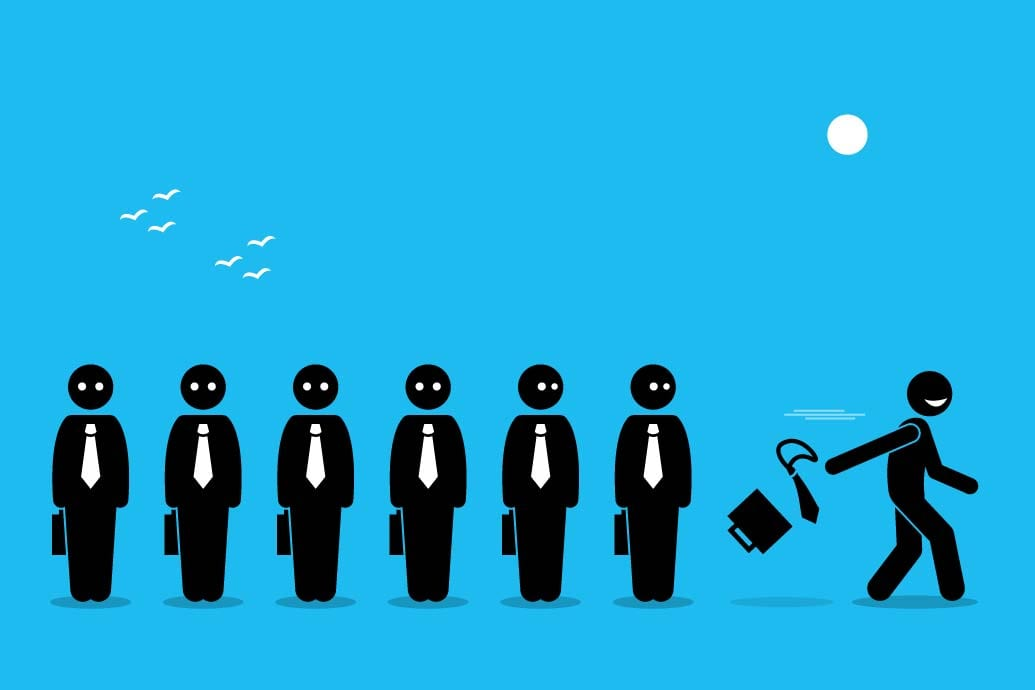

>>>>># EMPLOYEE  -  ATTRITION
>>>>>#  PYTHON GROUP PROJECT
>>>># INFO8065-22W-Sec1-Data Analytics
>>>># Conestoga College, Doon, Kitchener
>>>>## Prepared by - Amritjot Kaur & Sajid Poswal


### Date : April 8,2022
### Instructor : Ahsan Umar

###  1- INTRODUCTION TO DATASETS :-
#### In recent years, attention has increasingly been paid to human resources (HR), since worker quality and skills represent a growth factor and a real competitive advantage for companies. After proving its mettle in sales and marketing, artificial intelligence is also becoming central to employee-related decisions within HR management. Organizational growth largely depends on staff retention. Losing employees frequently impacts the morale of the organization and hiring new employees is more expensive than retaining existing ones. The key to success in any organization is attracting and retaining top talent. As an HR analyst one of the key task is to determine which factors keep employees at the company and which prompt others to leave. Given in the data is a set of data points on the employees who are either currently working within the company or have resigned. The objective is to identify and improve these factors to prevent loss of good people.


#### Importing all the necessary packages required in analysis:
Data analysis frequently necessitates modifications that are beyond the scope of Python's built-in capabilities. As a result, these external libraries/packages must be imported. Importing the essential libraries early in the process is common procedure (usually first two cells).

In [1]:
## Data Analysis Packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Data Visualization Packages
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

### 2- IMPORTING DATASETS AND CLEANING REQUIRED FILES :-
#### Sources - 
* Files Source - https://www.kaggle.com/datasets/colearninglounge/employee-attrition?select=employee_attrition_train.csv
* Data Description - https://community.ibm.com/community/user/home


In [2]:
employee_attrition = pd.read_csv(r'D:\Data Analytics Assignment\employee_attrition_train.csv',na_values = 'None')
employee_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,Unnamed: 7,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,2,NaN,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279.0,Research & Development,8.0,1,NaN,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2,NaN,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392.0,Research & Development,NaN,4,NaN,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1,NaN,Medical,1,...,4,80,1,6,3,3,2,2,2,2


####  a) Cleaning data after importing the required files:
* Removing empty/unwanted columns
* Removing unwanted white spaces
* Filling empty cells
* Removing Duplicate rows 
* Cleaning the column names from any leading or trailing white spaces
* Dropping columns with Highly Missing Values

In [3]:
## Removing empty/unwanted columns
## Dropping columns with Highly Missing Values
employee_attrition = employee_attrition.drop("Unnamed: 7", axis = 1) 
employee_attrition = employee_attrition.drop("Unnamed: 18", axis = 1) 

##Cleaning the column names from any leading or trailing white spaces

employee_attrition.columns = employee_attrition.columns.str.strip()
employee_attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279.0,Research & Development,8.0,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392.0,Research & Development,NaN,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,No,Travel_Rarely,1167.0,Sales,NaN,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1025,36.0,No,Travel_Frequently,884.0,Research & Development,23.0,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1026,39.0,No,Travel_Rarely,NaN,Research & Development,6.0,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1027,27.0,No,Travel_Rarely,155.0,Research & Development,4.0,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3


#### b) Information and description of the Dataset.

In [4]:
employee_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [5]:
employee_attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,893.000000,1002.000000,934.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,...,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.930571,800.528942,9.930407,2.892128,1.0,1024.367347,2.683188,66.680272,2.713314,2.043732,...,2.689990,80.0,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,9.395978,408.109828,8.421791,1.053541,0.0,606.301635,1.096829,20.474094,0.710146,1.118918,...,1.077767,0.0,0.874662,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,458.250000,2.000000,2.000000,1.0,496.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,801.500000,8.000000,3.000000,1.0,1019.000000,3.000000,67.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1162.000000,16.000000,4.000000,1.0,1553.000000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


#### c) Proportion of null values in thedataset:

In [6]:
employee_attrition.isnull().sum()/employee_attrition.shape[0]

Age                         0.132167
Attrition                   0.000000
BusinessTravel              0.004859
DailyRate                   0.026239
Department                  0.000000
DistanceFromHome            0.092323
Education                   0.000000
EducationField              0.000000
EmployeeCount               0.000000
EmployeeNumber              0.000000
EnvironmentSatisfaction     0.000000
Gender                      0.000000
HourlyRate                  0.000000
JobInvolvement              0.000000
JobLevel                    0.000000
JobRole                     0.000000
JobSatisfaction             0.000000
MaritalStatus               0.004859
MonthlyIncome               0.000000
MonthlyRate                 0.000000
NumCompaniesWorked          0.000000
Over18                      0.000000
OverTime                    0.000000
PercentSalaryHike           0.000000
PerformanceRating           0.000000
RelationshipSatisfaction    0.000000
StandardHours               0.000000
S

### 3- ANALYSIS :-

#### a) What differnet kinds of Departments are used for the analysis? How many are there in total?
For capturing the different kind of benefits unique() method is used, whereas nunique() is used to get the count of unique benefits that are being offered.

In [7]:
employee_attrition['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [8]:
employee_attrition['Department'].nunique()

3

#### b) Count department-wise number of employees attriting after and before the age of 40.


In [9]:
employee_attrition.groupby(['Department'])['Attrition'].value_counts()

Department              Attrition
Human Resources         No            34
                        Yes            8
Research & Development  No           577
                        Yes           99
Sales                   No           242
                        Yes           69
Name: Attrition, dtype: int64

In [10]:
employee_attrition[employee_attrition['Age']>40, ].groupby(['Department'])['Attrition'].value_counts().plot(kind = 'barh')

TypeError: '(0        True
1        True
2       False
3       False
4       False
        ...  
1024    False
1025    False
1026    False
1027    False
1028    False
Name: Age, Length: 1029, dtype: bool,)' is an invalid key

<AxesSubplot:ylabel='Department,Attrition'>

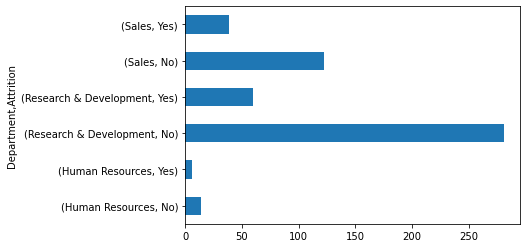

In [11]:
employee_attrition[employee_attrition['Age']<40].groupby(['Department'])['Attrition'].value_counts().plot(kind = 'barh')

#### c) How may employees were divorced vs Married vs Single when they quit their jobs?

In [13]:
employee_attrition[(employee_attrition['MaritalStatus'] == 'Divorced') & (employee_attrition['Attrition'] == 'Yes')].shape

(19, 35)

In [6]:
employee_attrition[(employee_attrition['MaritalStatus'] == 'Married') & (employee_attrition['Attrition'] == 'Yes')].shape

(61, 35)

In [7]:
employee_attrition[(employee_attrition['MaritalStatus'] == 'Single') & (employee_attrition['Attrition'] == 'Yes')].shape

(95, 35)

#### d) Count the number of employees under their total working years of employees using seaborn package.

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

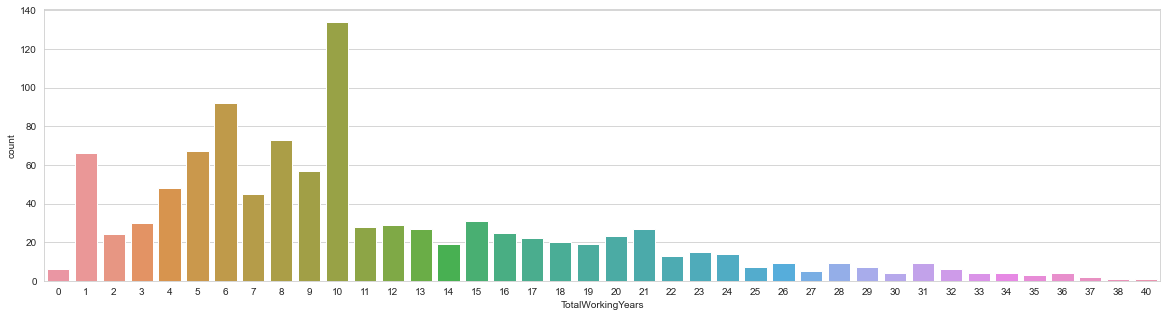

In [90]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(data = employee_attrition, x = 'TotalWorkingYears')
#using altair package
#alt.Chart(Network).mark_bar().encode(x = 'StateCode', y = 'count(NetworkId)')  


#### e) What proportion of employees left their jobs due to frequent travel?

In [17]:
employee_attrition.loc[employee_attrition['BusinessTravel'] == 'Travel_Frequently','Attrition'].value_counts()

No     150
Yes     49
Name: Attrition, dtype: int64

In [18]:
employee_attrition.loc[employee_attrition['BusinessTravel'] == 'Travel_Frequently','Attrition'].value_counts(normalize=True)

No     0.753769
Yes    0.246231
Name: Attrition, dtype: float64

In [8]:
employee_attrition.loc[employee_attrition['BusinessTravel'] == 'Travel_Rarely','Attrition'].value_counts(normalize=True)

No     0.835408
Yes    0.164592
Name: Attrition, dtype: float64

#### f) Heatmap showing the attrtion rate as per job satisfaction.

<AxesSubplot:ylabel='JobSatisfaction'>

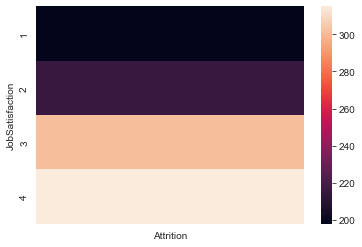

In [92]:
Data_Pivot = employee_attrition.pivot_table(index = 'JobSatisfaction', values = 'Attrition', aggfunc = 'count')
sns.heatmap(Data_Pivot)

#### g) Pairwise relationships between continuous variables
We typically want to avoid using variables that have strong correlations with each other -- hence avoiding feature redundancy -- for a few reasons:

To keep the model simple and improve interpretability (with many features, we run the risk of overfitting).
When our datasets are very large, using fewer features can drastically speed up our computation time.
To get a sense of whether there are any strongly correlated features in our data, we will use built-in functions in the pandas package.

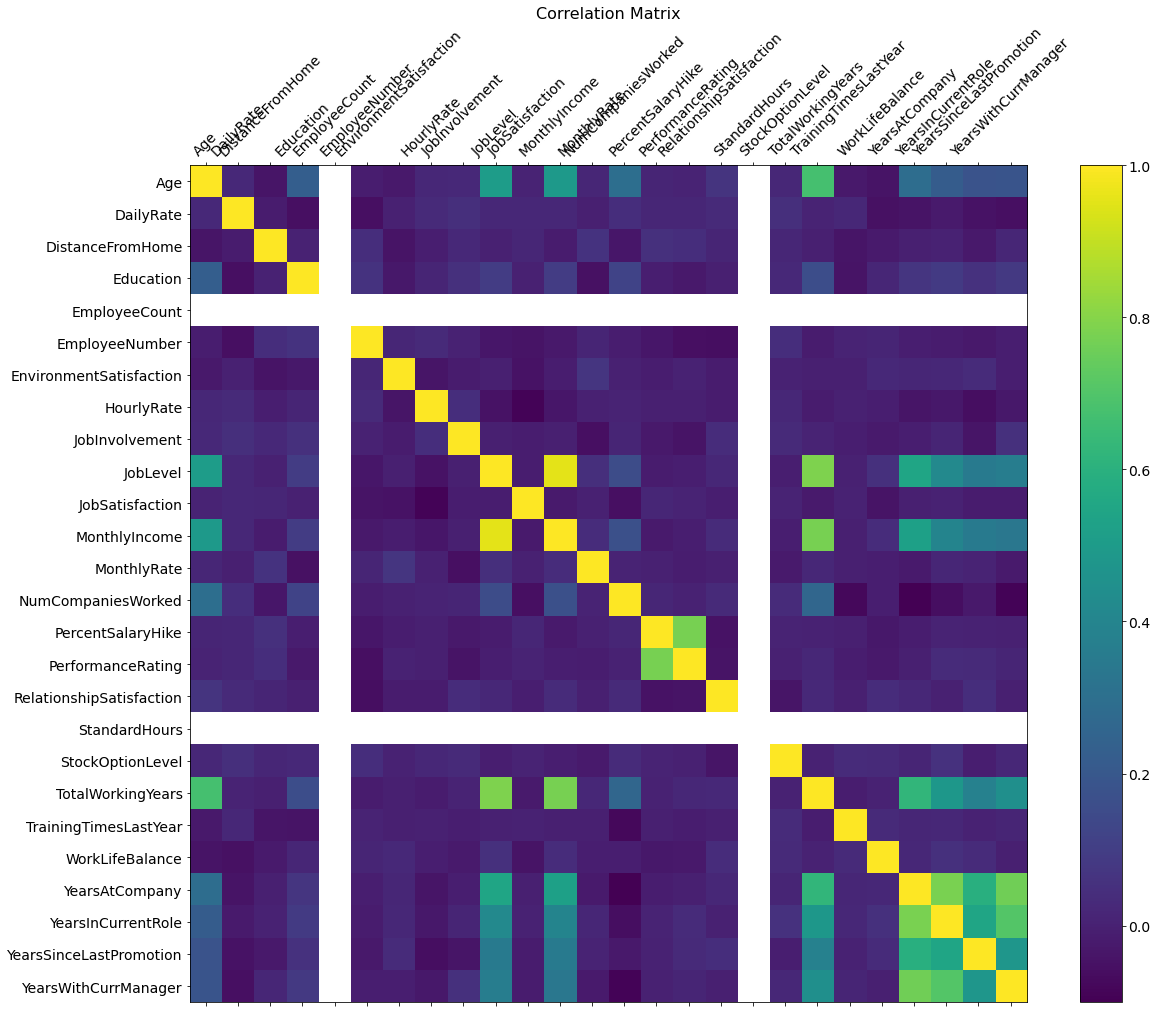

In [25]:
corr_metrics = employee_attrition.corr()
corr_metrics.style.background_gradient()

f = plt.figure(figsize=(19, 15))
plt.matshow(corr_metrics, fignum=f.number)
plt.xticks(range(employee_attrition.select_dtypes(['number']).shape[1]), employee_attrition.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(employee_attrition.select_dtypes(['number']).shape[1]), employee_attrition.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


#### h) Analysis on impact of hourly rate for both males and females on attrition.


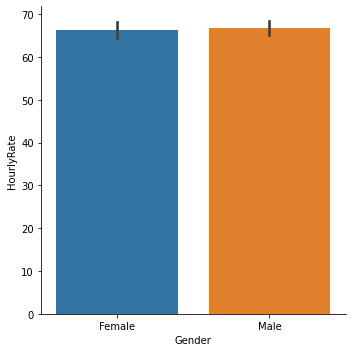

In [17]:
sns.catplot(x = 'Gender', y = 'HourlyRate', kind = 'bar', data = employee_attrition)

In [12]:
alt.Chart(employee_attrition).mark_bar().encode(x ='Gender', y = 'count(Attrition)')

alt.Chart(...)

#### i) Use a mask to plot only the lower triangle of dataset correlation.
Mask() function return an object of same shape as self and whose corresponding entries are from self where cond is False and otherwise are from other object. The other object could be a scalar, series, dataframe or could be a callable.

* Masking- https://towardsdatascience.com/the-concept-of-masks-in-python-50fd65e64707
* np.zeros_like- https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html?highlight=zeros_like
* triu_indices_from- https://numpy.org/doc/stable/reference/generated/numpy.triu_indices_from.html?highlight=triu#numpy.triu_indices_fromtriu_indices_from- 
* heatmap- https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap
* why to use subplots- https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca

plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png')). You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway,

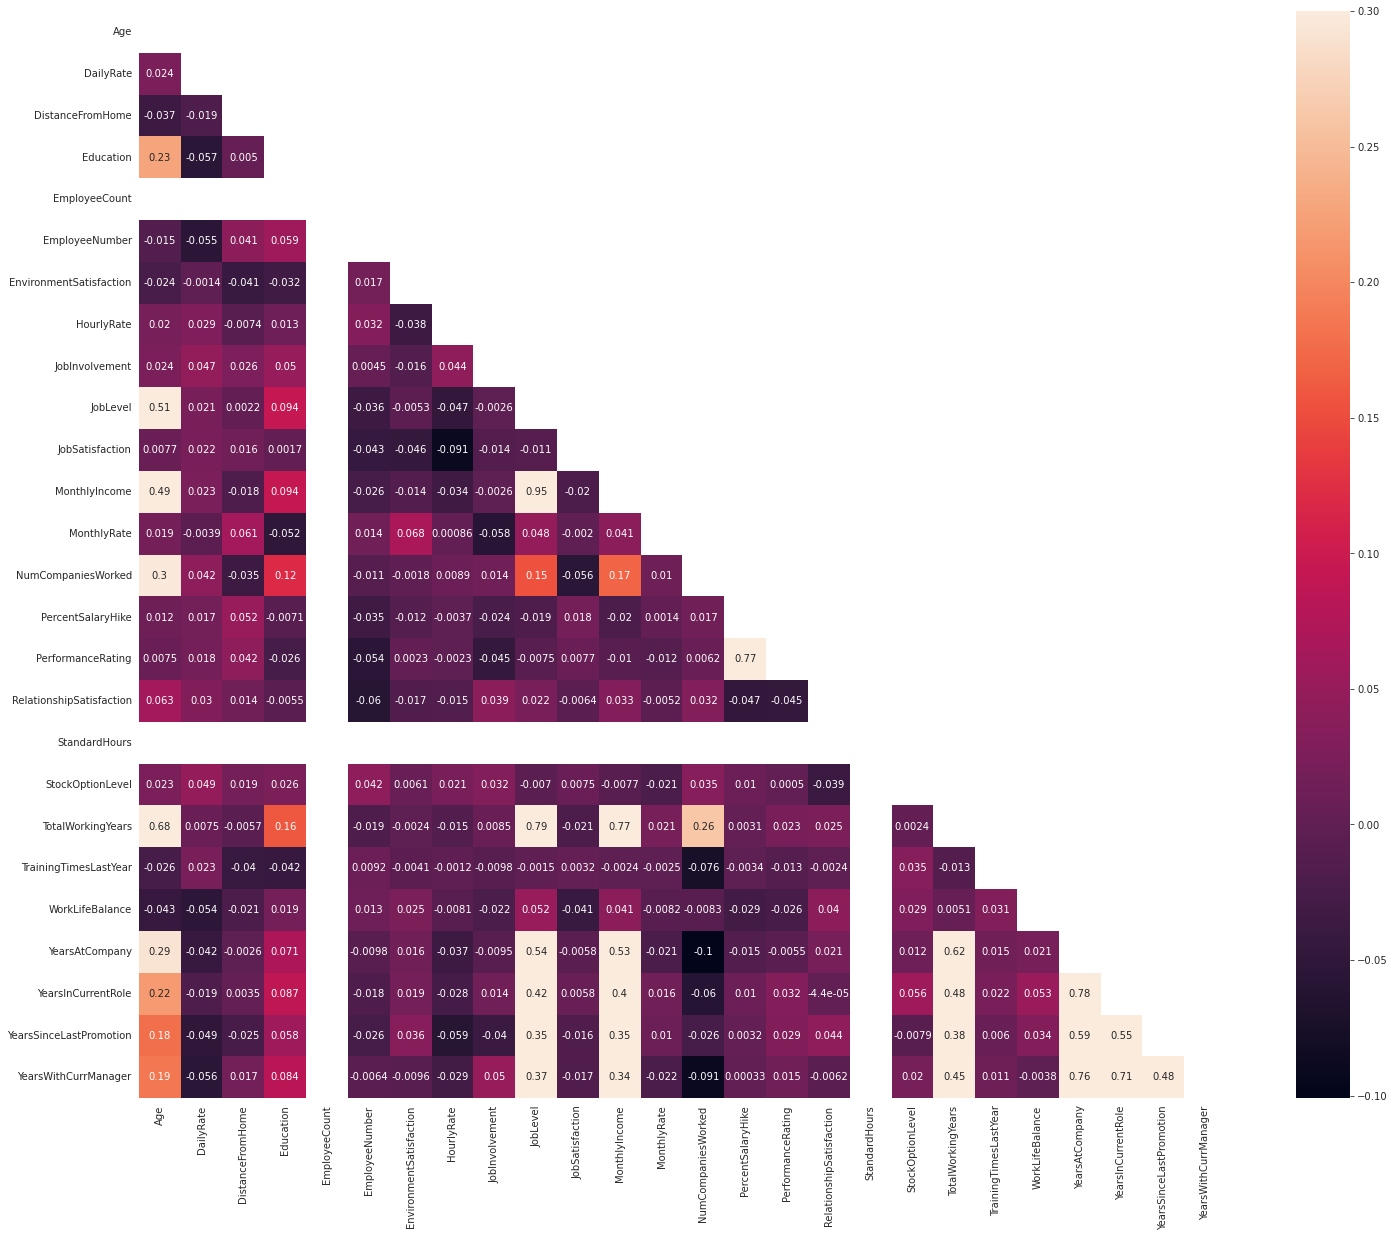

In [31]:
mask = np.zeros_like(corr_metrics) #zeros_like- Return an array of zeros with the same shape and type as a given array.
mask[np.triu_indices_from(mask)] = True #mask=True or mask=1 means label this value as invalid, 
                                         #triu_indices_from- Return the indices for the upper-triangle of arr
with sns.axes_style("white"): #The style parameters control properties like the color of the background and whether a grid is enabled by default. 
    fig, ax = plt.subplots(figsize=(25, 20))
    ax = sns.heatmap(corr_metrics, mask=mask, vmax=.3, square=True, annot = True)

#### j) How many males and females who Travelled Rarely, attrited.

In [42]:
employee_attrition.groupby(['Gender','BusinessTravel'])['Attrition'].value_counts()

Gender  BusinessTravel     Attrition
Female  Non-Travel         No            28
                           Yes            1
        Travel_Frequently  No            68
                           Yes           21
        Travel_Rarely      No           250
                           Yes           41
Male    Non-Travel         No            66
                           Yes            7
        Travel_Frequently  No            82
                           Yes           28
        Travel_Rarely      No           354
                           Yes           78
Name: Attrition, dtype: int64

In [47]:
employee_attrition[(employee_attrition['BusinessTravel'] == "Travel_Rarely")].groupby(['Gender','BusinessTravel'])['Attrition'].value_counts()

Gender  BusinessTravel  Attrition
Female  Travel_Rarely   No           250
                        Yes           41
Male    Travel_Rarely   No           354
                        Yes           78
Name: Attrition, dtype: int64

#### k) What is the attrition rate by MaritalStatus and jobrole?

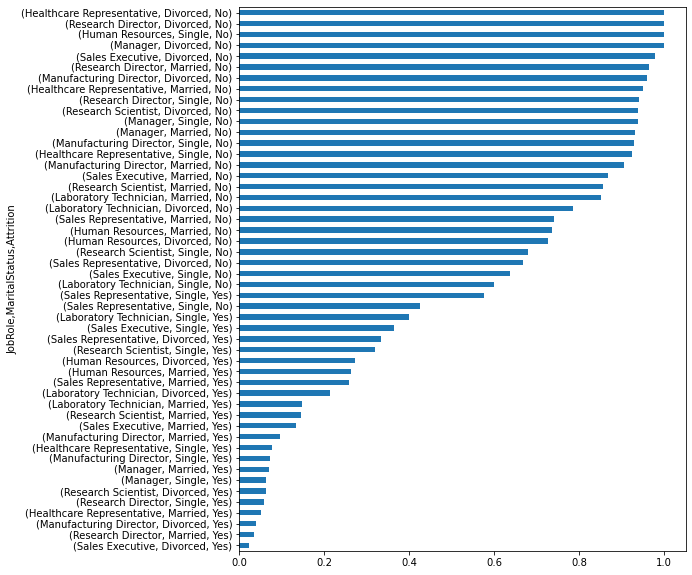

In [61]:
employee_attrition.groupby(['JobRole','MaritalStatus'])['Attrition'].value_counts(normalize=True).sort_values().plot(kind='barh',figsize=(8,10))

#### l) Predicting the job satisfaction on the basis of hourly rates and worklifebalance.

In [4]:
lr = LinearRegression()

X = employee_attrition[['HourlyRate','WorkLifeBalance']]
y = employee_attrition['JobSatisfaction']

## Fit the data
lr.fit(X,y)

## Coefficients of the model
lr.coef_

array([-0.00491617, -0.0662002 ])

In [5]:
## Check Predictions and creating a scatterplot of the real test values versus the predicted values.
employee_attrition['Jobsat_predicted']= lr.predict(X)

Text(0, 0.5, 'Predicted_Data')

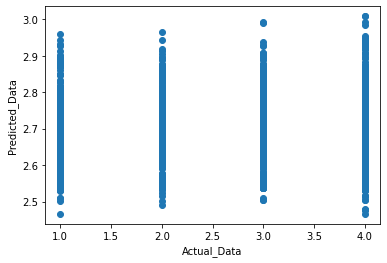

In [6]:
plt.scatter(employee_attrition['JobSatisfaction'], employee_attrition['Jobsat_predicted'])
plt.xlabel('Actual_Data')
plt.ylabel('Predicted_Data')

#### Evaluation Matrix for regression models:
Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.
* MAE - The mean absolute error (MAE) is defined as the sum of the absolute value of the differences between all the expected values and predicted values, divided by the total number of predictions.
* MSE - of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.
* RMSE - is defined as the square root of the average of the squared errors.
#### Insights:
* An ideal Mean Squared Error (MSE) value is 0.0, which means that all predicted values matched the expected values exactly. MSE is most useful when the dataset contains outliers , or unexpected values (too high values or too low values).
* An ideal Root Mean Square Error (RMSE) value is 0.0, which means that all prediction values matched the expected values exactly.

##### Resources:
* https://www.youtube.com/watch?v=K490SP-_H0U
* https://amete.github.io/DataSciencePortfolio/Udemy/Python-DS-and-ML-Bootcamp/Linear_Regression_Project.html

In [9]:
from sklearn import metrics
from math import sqrt

print('MAE:', 
      metrics.mean_absolute_error(employee_attrition['JobSatisfaction'], employee_attrition['Jobsat_predicted']), ' ',
      (1./len(employee_attrition['JobSatisfaction']))*(sum(abs(employee_attrition['JobSatisfaction']-employee_attrition['Jobsat_predicted']))))
print('MSE:', 
      metrics.mean_squared_error(employee_attrition['JobSatisfaction'], employee_attrition['Jobsat_predicted']), ' ',
      (1./len(employee_attrition['JobSatisfaction']))*(sum((employee_attrition['JobSatisfaction']-employee_attrition['Jobsat_predicted'])**2)))
print('RMSE:', 
      np.sqrt(metrics.mean_squared_error(employee_attrition['JobSatisfaction'], employee_attrition['Jobsat_predicted'])), ' ',
      sqrt((1./len(employee_attrition['JobSatisfaction']))*(sum((employee_attrition['JobSatisfaction']-employee_attrition['Jobsat_predicted'])**2))))

MAE: 0.9473786648498667   0.9473786648498668
MSE: 1.18982046741829   1.1898204674182888
RMSE: 1.0907889197357525   1.090788919735752


#### m) Which department faced the maximum attrition?

In [27]:
employee_attrition.groupby(['Department'])['Attrition'].value_counts()

Department              Attrition
Human Resources         No            34
                        Yes            8
Research & Development  No           577
                        Yes           99
Sales                   No           242
                        Yes           69
Name: Attrition, dtype: int64

In [26]:
employee_attrition[employee_attrition['Attrition']== 'Yes'].groupby(['Department'])['Attrition'].value_counts().idxmax()

('Research & Development', 'Yes')

#### n) Count the number of Attritions for as per education field as well as job roles.
This code shows the count of attritions for different jobrole. The analysis shows that "Sales Executive" faced most attrition, however "Human Resources" the least. 

<AxesSubplot:ylabel='EducationField,Attrition'>

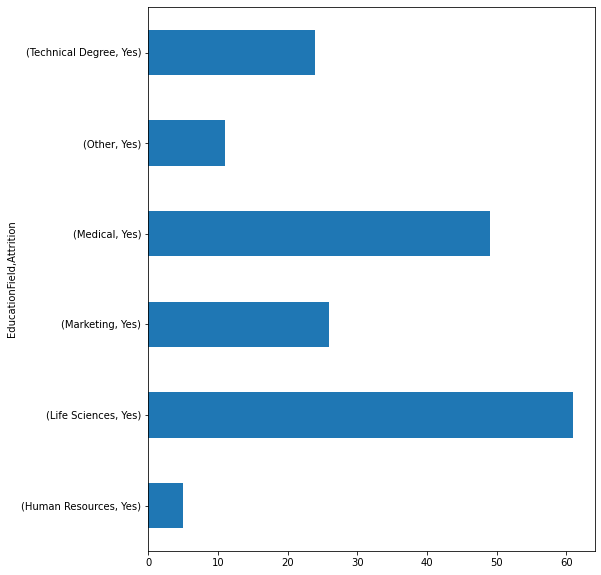

In [35]:
employee_attrition[employee_attrition['Attrition']== 'Yes'].groupby(['EducationField'])['Attrition'].value_counts().plot(kind='barh',figsize=(8,10))
#alt.Chart(employee_attrition).mark_bar().encode(x = 'EducationField:O', y = 'count(Attrition):Q').transform_filter(employee_attrition.Attrition == 'Yes')

<AxesSubplot:ylabel='JobRole,Attrition'>

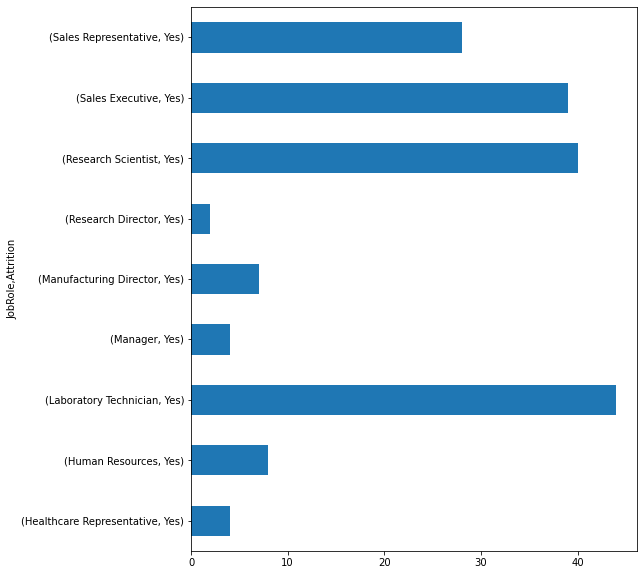

In [34]:
#alt.Chart(employee_attrition).mark_bar().encode(x = 'JobRole', y = 'count(Attrition)')  
employee_attrition[employee_attrition['Attrition']== 'Yes'].groupby(['JobRole'])['Attrition'].value_counts().plot(kind='barh',figsize=(8,10))

#### o) Analyse the impact of Distance from home on attrition.

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

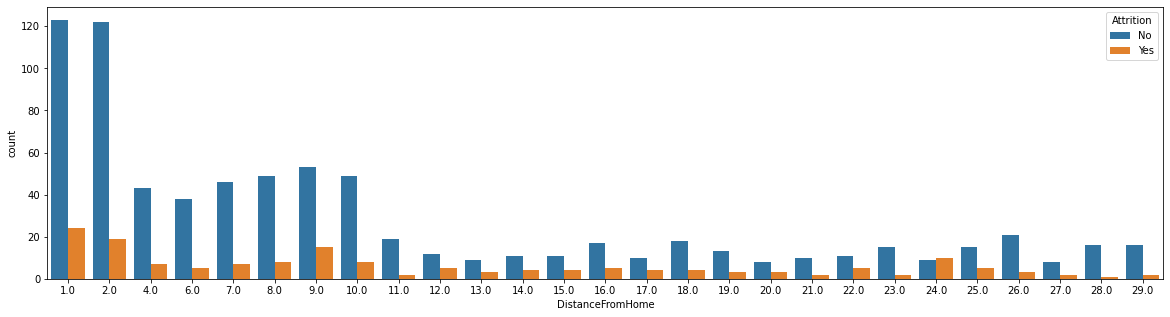

In [31]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(data = employee_attrition, x = 'DistanceFromHome', hue = 'Attrition') #distance in kilometers
#using altair package
#alt.Chart(Network).mark_bar().encode(x = 'StateCode', y = 'count(NetworkId)')


#### p) Compare the attrition rate on the basis of employee's 'Years At Company', 'Years In Current Role', 'Years Since Last Promotion', 'Years With Current Manager'.
In order to compare multiple variables, pair plot is used. A pairs plot is a matrix of scatterplots that lets you understand the pairwise relationship between different variables in a dataset.

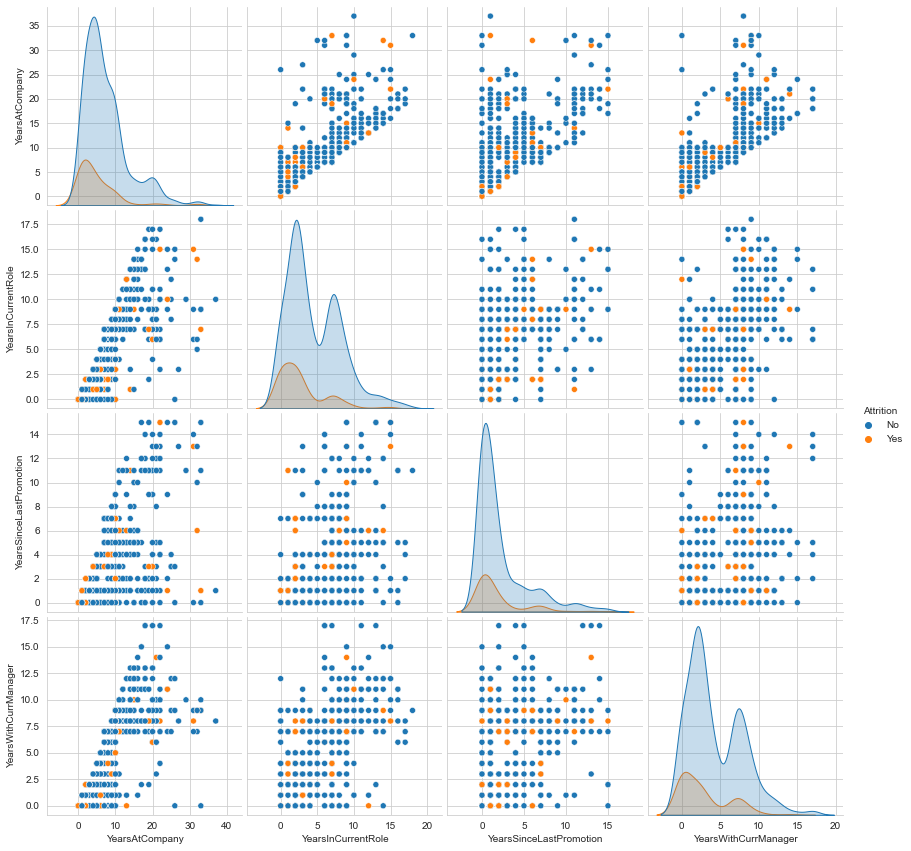

In [78]:
employee_attrition_subset = employee_attrition[['Attrition','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
employee_attrition_subset
plt.close();
sns.set_style("whitegrid");
sns.pairplot(employee_attrition_subset, height=3, hue = 'Attrition')
plt.show()

### q) Show the attrition values as per the employees' years at company, in current job role, since last promotion, with current manager, for different jobroles.

In [16]:
employee_at = pd.pivot_table(employee_attrition, values = 
                             ['MonthlyIncome','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
                            index =['JobRole', 'Attrition'], aggfunc = max, margins_name = 'Attrition')

In [17]:
employee_at.style.background_gradient(cmap = 'cubehelix')

In [19]:
employee_at.corr()

,MonthlyIncome,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
MonthlyIncome,1.000000,0.775625,0.703438,0.558383,0.417018
YearsAtCompany,0.775625,1.000000,0.771815,0.634345,0.586807
YearsInCurrentRole,0.703438,0.771815,1.000000,0.906418,0.829976
YearsSinceLastPromotion,0.558383,0.634345,0.906418,1.000000,0.813841
YearsWithCurrManager,0.417018,0.586807,0.829976,0.813841,1.000000


<AxesSubplot:ylabel='JobRole-Attrition'>

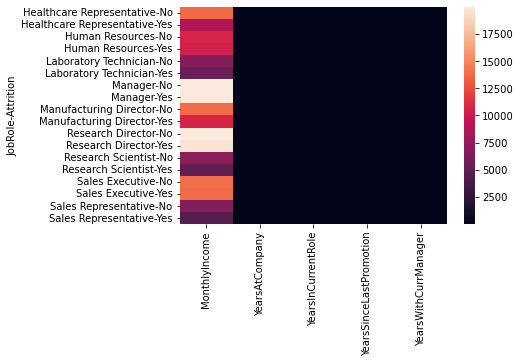

In [18]:
sns.heatmap(employee_at)

# THANK YOU!!